# Exercise 2.4 Hyperparameter Optimization Random Forest 1990s Belgrade

## Contents

1. Importing Data Libraries and Data Sets
2. Data Preprocessing
3. Hyperparameter Optimization
4. Optimizing Random Forest
5. Feature Importance

## 1. Importing Data Libraries and Data Sets

In [13]:
# Importing Libraries and removing column restriction display option
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

pd.set_option("display.max_columns", None)

In [16]:
# Path Creation
path = r"C:\Users\Andre\OneDrive\Desktop\ML with Python A2"

In [19]:
# Importing Cleaned Station Data
df = pd.read_csv(os.path.join(path, "weather_predict_cleaned.csv"))
df.head()

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,

In [22]:
# Dropping columns unencessary
df = df.drop(columns=["Unnamed: 0", "MONTH"])
df.head()

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,

In [25]:
df.shape

(22950, 136)

In [28]:
# Importing Pleasant weather
pleasant = pd.read_csv(os.path.join(path, "Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"))
pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
pleasant.shape

(22950, 16)

## 2. Data Preprocessing

In [35]:
# Filter weather dataset to 1990s
df_1990s = df[df['DATE'].astype(str).str.startswith('199')] 
df_1990s.head()

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,19900101,0,0.83,1.0217,0.60,0.00,7.2,-2.1,-3.6,1.2,2,0.86,1.0246,0.19,0.00,5.3,-1.3,-5.3,3.7,8,0.80,1.0263,0.18,0.0,0.0,0.1,-0.8,0.6,8,0.90,1.0198,0.10,0.00,0.0,0.5,0.0,1.2,8,0.93,1.0196,0.12,0.03,0.0,0.6,0.0,1.0,8,0.92,1.0160,0.13,0.15,0.0,4.5,2.6,9.9,8,0.94,1.0205,0.12,0.0,0.0,-1.3,-1.5,-0.7,8,0.80,1.0217,0.14,0.0,0.0,-1.5,-2.0,-0.6,8,0.96,1.0197,0.12,0.0,0.0,0.5,0.1,0.8,8,0.96,1.0215,0.29,0.65,0.0,7.7,7.0,8.4,2,0.89,1.0217,0.71,0.00,7.4,-5.4,-8.0,-0.4,7,0.76,1.0241,0.04,0.00,0.0,-6.7,-11.9,-4.2,0,0.52,1.0321,0.99,0.0,8.6,-8.2,-9.7,-6.7,6,0.76,1.0220,0.13,0.00,1.9,-2.9,-4.2,-0.3,3,0.82,1.0068,0.20,0.51,2.0,6.9,4.5,9.4
10959,19900102,2,0.84,1.0238,0.48,0.00,2.3,-1.8,-3.9,1.7,8,0.83,1.0235,0.18,0.03,0.0,-0.9,-2.0,-0.2,8,0.87,1.0233,0.18,0.0,0.0,-0.4,-0.8,0.5,7,0.94,1.0220,0.13,0.00,0.0,1.0,-0.8,2.2,8,0.91,1.0220,0.12,0.00,0.0,2.1,0.7,2.4,6,0.92,1.0178,0.13,0.00,0.0,5.2,0.4,5.5,8,0.92,1.0225,0.12,0.0,0.0,-0.7,-1.5,-0.2,8,0.82,1.0218,0.17,0.0,0.0,-1.9,-3.0,-1.3,8,0.99,1.0222,0.12,0.0,0.0,1.2,-1.8,2.8,8,0.90,1.0232,0.29,0.50,0.0,6.5,5.6,7.4,3,0.80,1.0238,0.60,0.00,5.0,-3.1,-10.4,3.0,8,0.73,1.0232,0.04,0.00,0.0,-5.9,-6.2,-4.3,1,0.63,1.0348,1.00,0.0,8.6,-10.4,-13.3,-7.5,8,0.73,1.0229,0.05,0.01,0.0,-4.3,-5.0,-3.4,5,0.79,1.0040,0.21,1.48,0.1,7.3,4.7,9.9
10960,19900103,8,0.89,1.0231,0.20,0.00,0.0,-2.2,-4.2,0.4,5,0.88,1.0241,0.18,0.11,0.0,-0.8,

In [39]:
# Create a list of the columns containing "" in their names

BELGRADE_list = list(x for x in df_1990s.columns if x.find('BELGRADE') >=0)
BELGRADE_list

['BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max']

In [44]:
# Create a dataframe with those columns

Belgrade = df_1990s[BELGRADE_list]
Belgrade

,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max
10958,2,0.86,1.0246,0.19,0.00,5.3,-1.3,-5.3,3.7
10959,8,0.83,1.0235,0.18,0.03,0.0,-0.9,-2.0,-0.2
10960,5,0.88,1.0241,0.18,0.11,0.0,-0.8,-1.4,0.0
10961,5,0.86,1.0327,0.39,0.00,0.0,-3.1,-4.5,-1.2
10962,0,0.62,1.0338,1.06,0.00,7.7,-5.7,-7.0,-1.2
...,...,...,...,...,...,...,...,...,...
14605,5,0.88,0.9957,0.24,0.37,0.0,4.1,2.6,10.7
14606,8,0.85,0.9873,0.24,1.94,0.0,4.7,1.2,6.3
14607,6,0.80,1.0074,0.24,0.00,0.0,2.0,1.4,5.8
14608,3,0.87,1.0240,0.61,0.00,2.8,0.3,-1.0,2.6


In [47]:
# Filter pleasant dataset to 1990s
pleasant_1990s = pleasant[pleasant['DATE'].astype(str).str.startswith('199')] 
pleasant_1990s.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
10958,19900101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10959,19900102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10960,19900103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10961,19900104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10962,19900105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
# Reduce pleasant_1990s dataset to Belgrade's answers only

pleasant_bel = pleasant_1990s['BELGRADE_pleasant_weather']
pleasant_bel

10958    0
10959    0
10960    0
10961    0
10962    0
        ..
14605    0
14606    0
14607    0
14608    0
14609    0
Name: BELGRADE_pleasant_weather, Length: 3652, dtype: int64

In [59]:
Belgrade.shape

(3652, 9)

In [63]:
pleasant_bel.shape

(3652,)

In [66]:
X2 = Belgrade

In [68]:
y2 = pleasant_bel

In [71]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [74]:
X.shape

(3652, 9)

In [77]:
y.shape

(3652,)

In [80]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=127)

In [83]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 9) (2739,)
(913, 9) (913,)


In [86]:
X_train

array([[ 8.    ,  0.93  ,  1.0307, ..., -2.    , -2.6   , -1.7   ],
       [ 8.    ,  0.92  ,  1.0049, ...,  3.7   ,  0.9   ,  5.9   ],
       [ 3.    ,  0.65  ,  1.022 , ..., 12.6   ,  9.4   , 18.7   ],
       ...,
       [ 2.    ,  0.38  ,  1.0235, ..., 19.4   , 15.1   , 25.1   ],
       [ 5.    ,  0.61  ,  1.019 , ...,  5.8   ,  3.7   , 10.3   ],
       [ 1.    ,  0.55  ,  1.0181, ..., 22.5   , 15.3   , 28.3   ]])

In [89]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,

## 3. Hyperparameter Optimization

### Grid Search

In [95]:
# Create a RF classifier

clf= RandomForestClassifier()

In [98]:
grid_space = {
    'max_depth': [3, 10, None],  # Focus on a smaller range
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_features': [15, 50],  # Focus on fewer values
    'min_samples_leaf': [1, 2],  # Smaller range
    'min_samples_split': [2, 3]  # Avoid using 1 (invalid in sklearn)
}

In [101]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Search took 0.10484852790832519 minutes


In [104]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best GRID search score is: 1.0


### Random Search

In [109]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [112]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [115]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 1.5834579348564148 minutes


In [120]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Best RANDOM search score is: 1.0


**To optimize the Random forest I will again use the Grid search parameters as they both have the best score as 1 but Grid search has a much quicker and efficient time**

## 4. Optimizing Random Forest

In [127]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 50, max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=15, n_estimators=50)

In [130]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


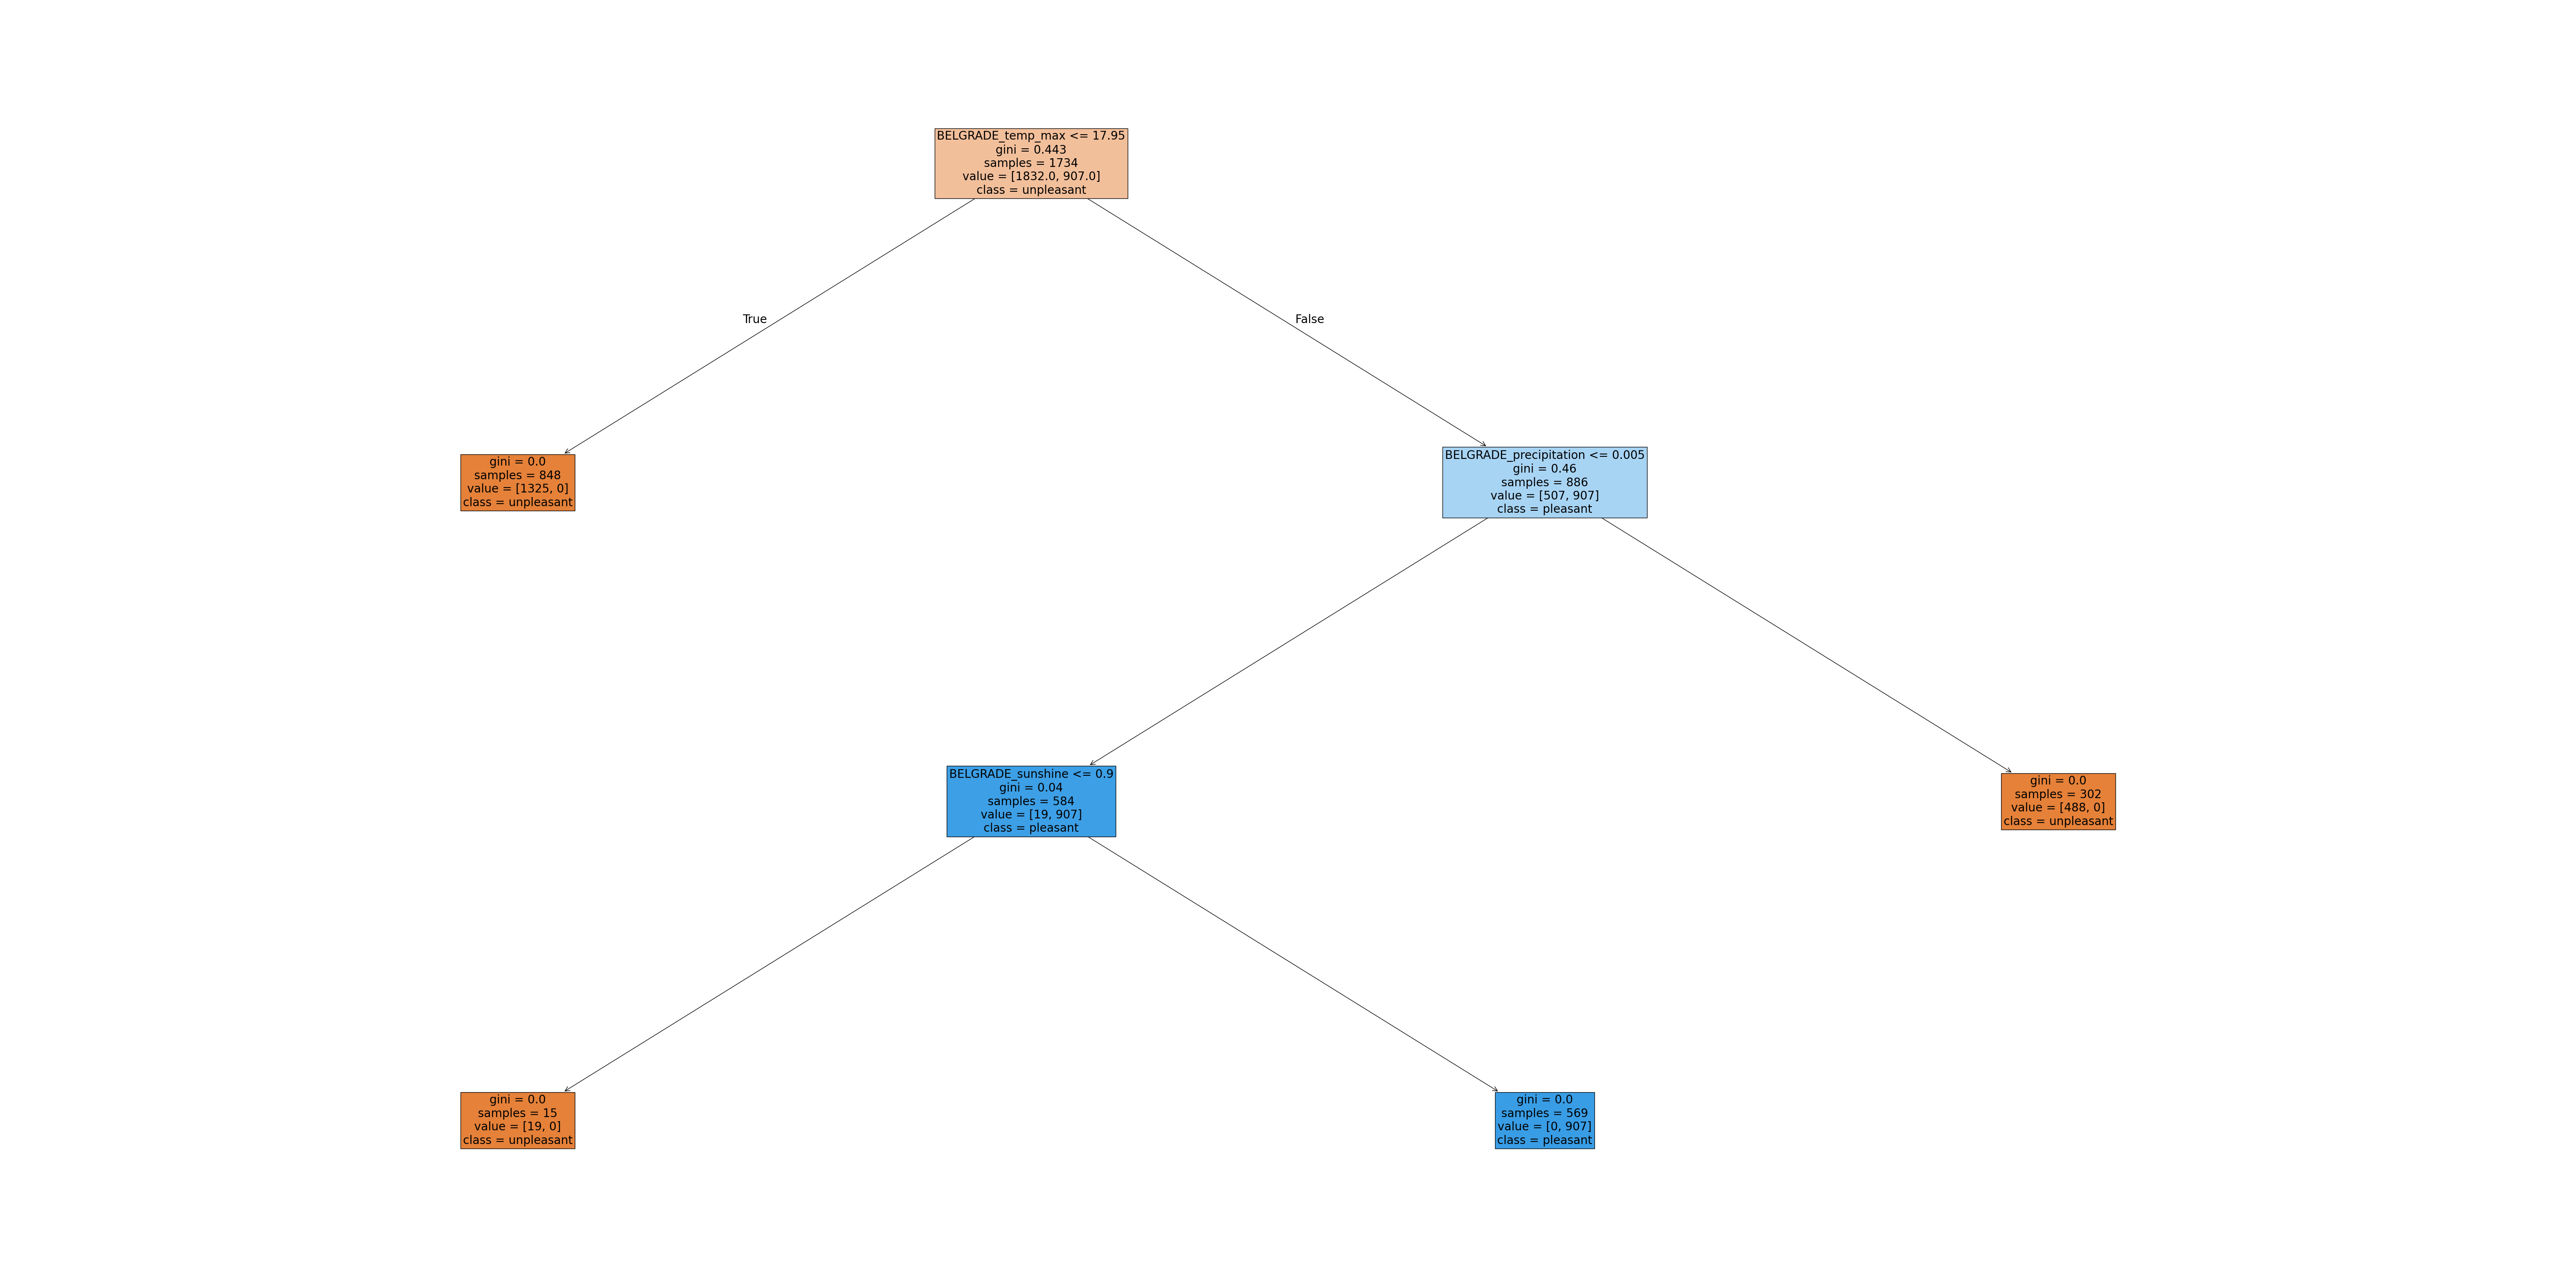

In [133]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[6], fontsize = 20, feature_names = Belgrade.columns, class_names=['unpleasant', 'pleasant'], filled=True);

## 5. Feature Importances

In [138]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([2.46376638e-04, 0.00000000e+00, 0.00000000e+00, 2.76591568e-05,
       4.98824350e-01, 3.39238863e-02, 1.12046503e-04, 2.58369110e-05,
       4.66839844e-01])

In [142]:
# Create a list of weather features

feat_list = [feature.replace('BELGRADE_', '') for feature in BELGRADE_list]
feat_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [150]:
important = pd.Series(newarray, index = feat_list)
important

cloud_cover         0.000246
humidity            0.000000
pressure            0.000000
global_radiation    0.000028
precipitation       0.498824
sunshine            0.033924
temp_mean           0.000112
temp_min            0.000026
temp_max            0.466840
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


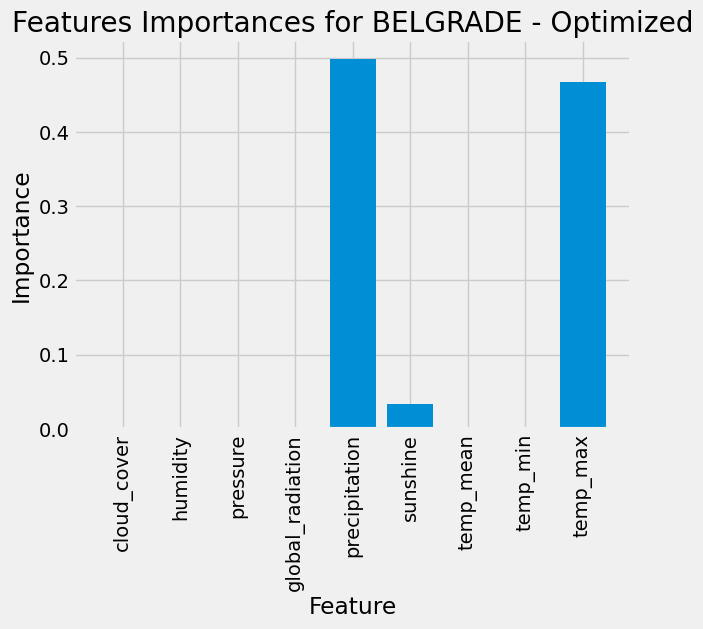

In [157]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(feat_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, feat_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for BELGRADE - Optimized');

plt.show()